In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
colors = {'red': '#ff207c', 'grey': '#42535b', 'blue': '#207cff', 'orange': '#ffa320', 'green': '#00ec8b'}
config_ticks = {'size': 14, 'color': colors['grey'], 'labelcolor': colors['grey']}
config_title = {'size': 18, 'color': colors['grey'], 'ha': 'left', 'va': 'baseline'}

In [19]:
def get_daily_stock_info(symbol):
    url = 'https://www.alphavantage.co/query?'                 

    params = {                                                 
        'function' : 'TIME_SERIES_DAILY_ADJUSTED',             
        'symbol' : symbol,                                     
        'outputsize' : 'full',                                 
        'apikey' : 'YOUR API KEY'                              
    } 

    response = requests.get(url, params=params)
    stock_dict = {'Date': [], 'Close': [], 'Volume': []}

    for key,value in response.json().items():
        if key != 'Meta Data': 
            stock_dict['Date'] = list(value.keys())
            for info in value.values():
                stock_dict['Close'].append(info['4. close'])
                stock_dict['Volume'].append(info['6. volume'])
    
    return(stock_dict)

def format_borders(plot):
    plot.spines['top'].set_visible(False)
    plot.spines['left'].set_visible(False)
    plot.spines['left'].set_color(colors['grey'])
    plot.spines['bottom'].set_color(colors['grey'])
    
def format_legend(plot):
    plot_legend = plot.legend(loc='upper left', bbox_to_anchor=(-0.005, 0.95), fontsize=16)
    for text in plot_legend.get_texts():
        text.set_color(colors['grey'])
        
def get_prev_day_info(plot):
    previous_close='$' + str("{:,}".format(stock_df['Close'][0])) 
    previous_volume=str("{:,}".format(stock_df['Volume'][0]))
    previous_date=str(stock_df['Date'][0].date())

    plot.set_title(
        'Closing price on ' + previous_date + ': ' + previous_close + 
        '\nShares traded on ' + previous_date + ': ' + previous_volume, 
         fontdict=config_title, loc='left'
    )
    
def plot_ma(plot, x, y):
    mov_avg = {
        'MA (50)': {'Range': 50, 'Color': colors['orange']}, 
        'MA (100)': {'Range': 100, 'Color': colors['green']}, 
        'MA (200)': {'Range': 200, 'Color': colors['red']}
    }
    
    for ma, ma_info in mov_avg.items():
        plot.plot(
            x, y.rolling(ma_info['Range']).mean(), 
            color=ma_info['Color'], label=ma, linewidth=2, ls='--'
        )

def get_charts(stock_data):
    plt.rc('figure', figsize=(15, 10))
    
    fig, axes = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
    fig.tight_layout(pad=3)
    fig.suptitle(symbol + ' Price and Volume', size=36, color=colors['grey'], x=0.24, y=1.10)
    
    date = stock_data['Date']
    close = stock_data['Close']
    vol = stock_data['Volume']
    
    plot_price = axes[0]
    plot_price.plot(date, close, color=colors['blue'], linewidth=2, label='Price')
    plot_price.yaxis.tick_right()
    plot_price.tick_params(axis='both', **config_ticks)
    plot_price.set_ylabel('Price (in USD)', fontsize=14)
    plot_price.yaxis.set_label_position("right")
    plot_price.yaxis.label.set_color(colors['grey'])
    plot_price.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5)
    plot_price.set_axisbelow(True)
    
    plot_ma(plot_price, date, close)
    format_borders(plot_price)
    format_legend(plot_price)
    get_prev_day_info(plot_price)   
    
    
    
    plot_vol = axes[1]
    plot_vol.bar(date, vol, width=15, color='darkgrey')
    plot_vol.yaxis.tick_right()
    plot_vol.tick_params(axis='both', **config_ticks)
    plot_vol.yaxis.set_label_position("right")
    plot_vol.set_xlabel('Date', fontsize=14)
    plot_vol.set_ylabel('Volume (in millions)', fontsize=14)
    plot_vol.yaxis.label.set_color(colors['grey'])
    plot_vol.xaxis.label.set_color(colors['grey'])
    
    format_borders(plot_vol)
    plt.savefig('price1.png', dpi=400, bbox_inches='tight')

Input a ticker:
tsla


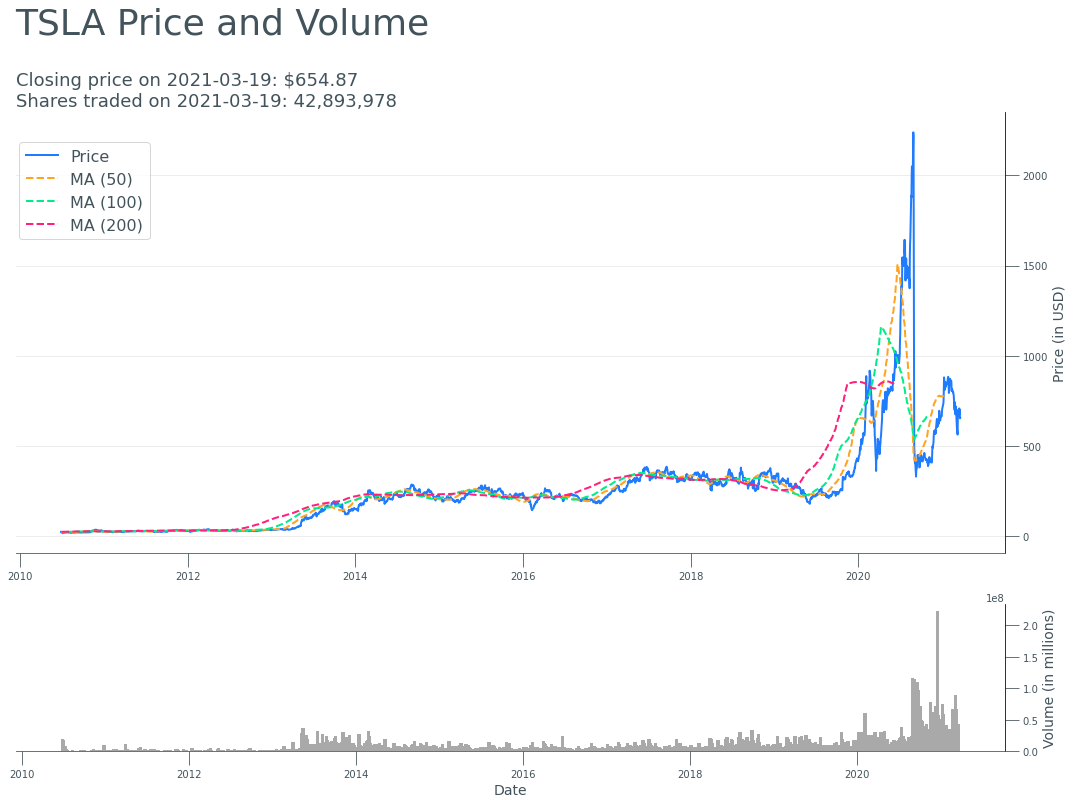

In [20]:
%matplotlib inline

## Main
symbol = input('Input a ticker:\n').upper()
stock_df = pd.DataFrame(get_daily_stock_info(symbol))
stock_df = stock_df.astype({'Date': 'datetime64[ns]', 'Close': 'float', 'Volume': 'int'}, copy=False)
get_charts(stock_df)